In [1]:
%matplotlib inline
import os
import json
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib.image import imread
import torch
from torchvision import transforms
from analyze import load_model, load_image_tensor
from lime import lime_image
from skimage.segmentation import mark_boundaries
from PIL import Image

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
dataset, loader, model = load_model(device)
num_classes = len(dataset.classes)

In [3]:
def predict_fn(image):
    x = torch.tensor(image).reshape(10, 3,224,224)
    return model(x.to(device)).cpu().numpy()

In [4]:
def load_image(filename):
    _, tensor = load_image_tensor(filename)
    return tensor.reshape(224,224,3).numpy()

In [5]:
with open('best10.json') as f:
    json_data = json.load(f)
data = {}
for label, images in json_data.items():
    if len(images) > 0:
        data[label] = images

In [6]:
def get_image():
    for images in data.values():
        for image in images:
            return image['image']
image = load_image(get_image())

In [7]:
with torch.set_grad_enabled(False):
    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(image, predict_fn, top_labels=5, hide_color=0, num_samples=1000)

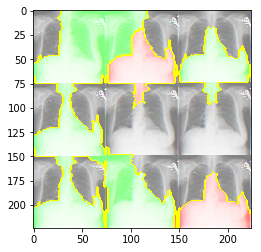

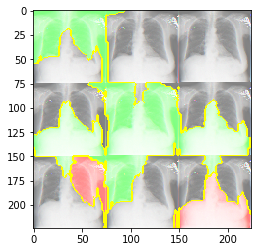

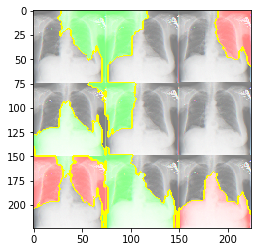

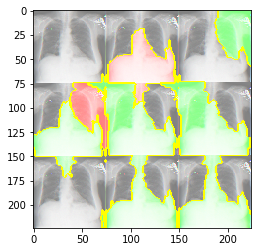

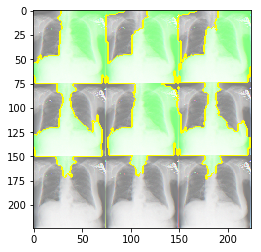

In [8]:
for label in explanation.local_exp.keys():
    temp, mask = explanation.get_image_and_mask(label, positive_only=False, num_features=10, hide_rest=False)
    plt.figure()
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [ ]:
"""
with torch.set_grad_enabled(False):
    for images in data.values():
        for image in images[:3]:
            explain(load_image(image['image']).numpy())
            break
        break
"""